In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
import ipynb.fs.defs.functions as funcs
import functions_python as funcs_py

pd.set_option('display.max_rows', 1000)

In [2]:
locations_df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200919.txt')
highlighted_stations = pd.read_csv('important_stations.csv')

In [3]:
# read in August 2019 mta data
august_2019_df_list = ['190803', '190810', '190817', '190824', '190831']

In [4]:
aug_2019_df = funcs.combine_dfs_add_time(august_2019_df_list)
aug_2019_df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  16:00:00   

      DESC  ENTRIES    EXITS           DATE_TIME  DAY_INT   DAY_STR  
0  REGULAR  7148288  2418935 2019-07-27 00:00:00        5  Saturday  
1  REGULAR  7148306  2418939 2019-07-27 04:00:00        5  Saturday  
2  REGULAR  7148326  2418975 2019-07-27 08:00:00        5  Saturday  
3  REGULAR  7148441  2419042 2019-07-27 12:00:00        5  Saturday  
4  REGULAR  7148647  2419101 2019-07-27 16:00:00        5  Saturday

In [5]:
aug_2019_df = funcs.add_entry_and_exit_differences(aug_2019_df)
aug_2019_df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
31945  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  00:00:00   
31946  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  04:00:00   
31947  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  08:00:00   
31948  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  12:00:00   
31949  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  16:00:00   

          DESC   ENTRIES     EXITS           DATE_TIME  DAY_INT   DAY_STR  \
31945  REGULAR  14868945  16617731 2019-07-27 00:00:00        5  Saturday   
31946  REGULAR  14868945  16617731 2019-07-27 04:00:00        5  Saturday   
31947  REGULAR  14868945  16617731 2019-07-27 08:00:00        5  Saturday   
31948  REGULAR  14868945  16617732 2019-07-27 12:00:00        5  Saturday   
31949  REGULAR  14868945  16617734 2019-07-27 16:00:00        5  Saturday   

       ENTRIES_DIFF  EXIT_DIFF  
31945           0.0        0.0  
31946           0.0        0.0  
31947           0.0        0.0  
31948           0.0        1.0  
31949           0.0        2.0

In [6]:
#new_df = aug_2019_df.set_index(["DATE_TIME"])
#new_df[new_df["STATION"]=="WTC-CORTLANDT"].resample("H").sum()

In [7]:
aug_2019_df = funcs.clean_entry_exit_values(aug_2019_df, 3000)
aug_2019_df.head()

You removed 12421 rows in the cleaning


C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
31945  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  00:00:00   
31946  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  04:00:00   
31947  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  08:00:00   
31948  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  12:00:00   
31949  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  16:00:00   

          DESC   ENTRIES     EXITS           DATE_TIME  DAY_INT   DAY_STR  \
31945  REGULAR  14868945  16617731 2019-07-27 00:00:00        5  Saturday   
31946  REGULAR  14868945  16617731 2019-07-27 04:00:00        5  Saturday   
31947  REGULAR  14868945  16617731 2019-07-27 08:00:00        5  Saturday   
31948  REGULAR  14868945  16617732 2019-07-27 12:00:00        5  Saturday   
31949  REGULAR  14868945  16617734 2019-07-27 16:00:00        5  Saturday   

       ENTRIES_DIFF  EXIT_DIFF  
31945           0.0        0.0  
31946           0.0        0.0  
31947           0.0        0.0  
31948           0.0        1.0  
31949           0.0        2.0

In [8]:
aug_2019_totals_per_station = funcs.totals_combined_per_station(aug_2019_df)
aug_2019_totals_per_station.sort_values("COMBINED", ascending=False)

ENTRIES_DIFF  EXIT_DIFF   COMBINED
STATION                                            
34 ST-PENN STA      4729027.0  4369860.0  9098887.0
GRD CNTRL-42 ST     3982742.0  3539798.0  7522540.0
34 ST-HERALD SQ     3589323.0  3430888.0  7020211.0
TIMES SQ-42 ST      2972993.0  2827218.0  5800211.0
14 ST-UNION SQ      2861936.0  2736963.0  5598899.0
23 ST               3165025.0  2397835.0  5562860.0
FULTON ST           2778077.0  2449023.0  5227100.0
42 ST-PORT AUTH     2745939.0  2282982.0  5028921.0
86 ST               2264155.0  2212989.0  4477144.0
125 ST              2198612.0  1935636.0  4134248.0
CANAL ST            2164823.0  1781690.0  3946513.0
59 ST COLUMBUS      2017257.0  1733948.0  3751205.0
47-50 STS ROCK      1732726.0  1797651.0  3530377.0
59 ST               1834469.0  1565482.0  3399951.0
FLUSHING-MAIN       1767197.0  1587891.0  3355088.0
96 ST               1700451.0  1452000.0  3152451.0
14 ST               1575263.0  1372085.0  2947348.0
PATH NEW WTC        1545668.0  1397771.0  2943439.0
CHAMBERS ST         1461401.0  1203523.0  2664924.0
42 ST-BRYANT PK     1299354.0  1298771.0  2598125.0
50 ST               1432406.0  1137626.0  2570032.0
W 4 ST-WASH SQ      1299403.0  1225417.0  2524820.0
28 ST               1311231.0  1202289.0  2513520.0
JKSN HT-ROOSVLT     1397095.0  1088678.0  2485773.0
72 ST               1242744.0  1167278.0  2410022.0
ATL AV-BARCLAY      1205768.0  1177179.0  2382947.0
LEXINGTON AV/53     1083394.0  1130526.0  2213920.0
WALL ST             1172568.0  1018038.0  2190606.0
7 AV                1116340.0  1000779.0  2117119.0
145 ST              1022533.0   957173.0  1979706.0
8 AV                1068495.0   824526.0  1893021.0
JAY ST-METROTEC     1085874.0   769377.0  1855251.0
57 ST-7 AV           996863.0   758666.0  1755529.0
CHURCH AV           1008811.0   745811.0  1754622.0
JAMAICA CENTER       930900.0   792891.0  1723791.0
BOWLING GREEN        869691.0   839272.0  1708963.0
JOURNAL SQUARE       801817.0   807812.0  1609629.0
77 ST                850729.0   757448.0  1608177.0
72 ST-2 AVE          850199.0   751019.0  1601218.0
B'WAY-LAFAYETTE      669407.0   908360.0  1577767.0
BOROUGH HALL         888069.0   627127.0  1515196.0
GRAND ST             831409.0   669986.0  1501395.0
KINGS HWY            773432.0   695112.0  1468544.0
DELANCEY/ESSEX       821721.0   642270.0  1463991.0
5 AV/53 ST           691038.0   763297.0  1454335.0
116 ST               881217.0   555234.0  1436451.0
103 ST               813106.0   607104.0  1420210.0
33 ST                762581.0   629117.0  1391698.0
KEW GARDENS          692468.0   697940.0  1390408.0
SUTPHIN-ARCHER       727263.0   640281.0  1367544.0
34 ST-HUDSON YD      653579.0   702990.0  1356569.0
CROWN HTS-UTICA      731428.0   588843.0  1320271.0
161/YANKEE STAD      817298.0   498536.0  1315834.0
GROVE STREET         642193.0   669007.0  1311200.0
49 ST                708285.0   577842.0  1286127.0
86 ST-2 AVE          755176.0   514655.0  1269831.0
51 ST                600687.0   662795.0  1263482.0
THIRTY THIRD ST      752495.0   500294.0  1252789.0
SPRING ST            768642.0   467912.0  1236554.0
NOSTRAND AV          689533.0   536570.0  1226103.0
JUNCTION BLVD        651561.0   560450.0  1212011.0
181 ST               609223.0   583155.0  1192378.0
FOREST HILLS 71      758543.0   408901.0  1167444.0
BEDFORD AV           723185.0   443843.0  1167028.0
WHITEHALL S-FRY      585715.0   562709.0  1148424.0
CORTLANDT ST         632185.0   477858.0  1110043.0
WOODHAVEN BLVD       700011.0   408793.0  1108804.0
PAVONIA/NEWPORT      549168.0   550268.0  1099436.0
CONEY IS-STILLW      613570.0   467283.0  1080853.0
LEXINGTON AV/63      528920.0   551284.0  1080204.0
CITY / BUS           523195.0   534732.0  1057927.0
103 ST-CORONA        597492.0   457665.0  1055157.0
DEKALB AV            792496.0   247273.0  1039769.0
2 AV                 519103.0   515030.0  1034133.0
68ST-HUNTER CO       542991.0   479957.0  1022948.0
82 ST-JACKSON

In [9]:
aug_2019_avg_per_station = funcs.avg_combined_per_station(aug_2019_df)
aug_2019_avg_per_station.sort_values("COMBINED", ascending=False)

ENTRIES_DIFF      EXIT_DIFF       COMBINED
STATION                                                     
34 ST-PENN STA   135115.057143  124853.142857  259968.200000
GRD CNTRL-42 ST  113792.628571  101137.085714  214929.714286
34 ST-HERALD SQ  102552.085714   98025.371429  200577.457143
TIMES SQ-42 ST    84942.657143   80777.657143  165720.314286
14 ST-UNION SQ    81769.600000   78198.942857  159968.542857
23 ST             90429.285714   68509.571429  158938.857143
FULTON ST         79373.628571   69972.085714  149345.714286
42 ST-PORT AUTH   78455.400000   65228.057143  143683.457143
86 ST             64690.142857   63228.257143  127918.400000
125 ST            62817.485714   55303.885714  118121.371429
CANAL ST          61852.085714   50905.428571  112757.514286
59 ST COLUMBUS    57635.914286   49541.371429  107177.285714
47-50 STS ROCK    49506.457143   51361.457143  100867.914286
59 ST             52413.400000   44728.057143   97141.457143
FLUSHING-MAIN     50491.342857   45368.314286   95859.657143
96 ST             48584.314286   41485.714286   90070.028571
14 ST             45007.514286   39202.428571   84209.942857
PATH NEW WTC      44161.942857   39936.314286   84098.257143
CHAMBERS ST       41754.314286   34386.371429   76140.685714
42 ST-BRYANT PK   37124.400000   37107.742857   74232.142857
50 ST             40925.885714   32503.600000   73429.485714
JKSN HT-ROOSVLT   41091.029412   32019.941176   73110.970588
W 4 ST-WASH SQ    37125.800000   35011.914286   72137.714286
28 ST             37463.742857   34351.114286   71814.857143
72 ST             35506.971429   33350.800000   68857.771429
ATL AV-BARCLAY    34450.514286   33633.685714   68084.200000
LEXINGTON AV/53   30954.114286   32300.742857   63254.857143
WALL ST           33501.942857   29086.800000   62588.742857
7 AV              31895.428571   28593.685714   60489.114286
145 ST            29215.228571   27347.800000   56563.028571
8 AV              30528.428571   23557.885714   54086.314286
JAY ST-METROTEC   31024.971429   21982.200000   53007.171429
57 ST-7 AV        28481.800000   21676.171429   50157.971429
CHURCH AV         28823.171429   21308.885714   50132.057143
JAMAICA CENTER    26597.142857   22654.028571   49251.171429
BOWLING GREEN     24848.314286   23979.200000   48827.514286
JOURNAL SQUARE    22909.057143   23080.342857   45989.400000
77 ST             24306.542857   21641.371429   45947.914286
72 ST-2 AVE       24291.400000   21457.685714   45749.085714
B'WAY-LAFAYETTE   19125.914286   25953.142857   45079.057143
BOROUGH HALL      25373.400000   17917.914286   43291.314286
GRAND ST          23754.542857   19142.457143   42897.000000
KINGS HWY         22098.057143   19860.342857   41958.400000
DELANCEY/ESSEX    23477.742857   18350.571429   41828.314286
5 AV/53 ST        19743.942857   21808.485714   41552.428571
116 ST            25177.628571   15863.828571   41041.457143
103 ST            23231.600000   17345.828571   40577.428571
33 ST             21788.028571   17974.771429   39762.800000
KEW GARDENS       19784.800000   19941.142857   39725.942857
SUTPHIN-ARCHER    20778.942857   18293.742857   39072.685714
34 ST-HUDSON YD   18673.685714   20085.428571   38759.114286
CROWN HTS-UTICA   20897.942857   16824.085714   37722.028571
161/YANKEE STAD   23351.371429   14243.885714   37595.257143
GROVE STREET      18348.371429   19114.485714   37462.857143
49 ST             20236.714286   16509.771429   36746.485714
86 ST-2 AVE       21576.457143   14704.428571   36280.885714
51 ST             17162.485714   18937.000000   36099.485714
THIRTY THIRD ST   21499.857143   14294.114286   35793.971429
SPRING ST         21961.200000   13368.914286   35330.114286
NOSTRAND AV       19700.942857   15330.571429   35031.514286
JUNCTION BLVD     18616.028571   16012.857143   34628.885714
181 ST            17406.371429   16661.571429   34067.942857
FOREST HILLS 71   21672.657143   11682.885714   33355.542857
BEDFORD AV        20662.428571   12681.228571   33343

In [10]:
aug_2019_avg_traffic_per_day_per_station = funcs.avg_per_day_of_week(aug_2019_df)
aug_2019_avg_traffic_per_day_per_station.head()

ENTRIES_DIFF  EXIT_DIFF  COMBINED
STATION DAY_STR  DAY_INT                                   
1 AV    Friday   4             16448.0    18357.8   34805.8
        Monday   0             14081.4    16142.0   30223.4
        Saturday 5              6475.0     7613.6   14088.6
        Sunday   6              4539.8     6077.2   10617.0
        Thursday 3             16550.4    17914.8   34465.2

In [11]:
aug_2019_avg_traffic_per_day_per_time_per_station = funcs.avg_per_day_of_week_and_time(aug_2019_df)
aug_2019_avg_traffic_per_day_per_time_per_station

ENTRIES_DIFF  EXIT_DIFF  COMBINED
STATION   DAY_STR   DAY_INT TIME                                       
1 AV      Friday    4       00:00:00        2328.8     2165.6    4494.4
                            04:00:00         306.0      251.6     557.6
                            08:00:00         990.8     2329.6    3320.4
                            12:00:00        3991.2     4206.6    8197.8
                            16:00:00        3660.0     3915.6    7575.6
...                                            ...        ...       ...
ZEREGA AV Wednesday 2       05:00:00          68.4       74.8     143.2
                            09:00:00         994.0      448.0    1442.0
                            13:00:00         468.2      325.8     794.0
                            17:00:00         509.0      529.4    1038.4
                            21:00:00         314.4      731.2    1045.6

[59268 rows x 3 columns]

In [12]:
# clean the highlighted stations
highlighted_stations.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
highlighted_stations.rename(columns={'stations': 'STATION'}, inplace=True)
highlighted_stations.head()

STATION  university   tech   rich  total score
0             1 AV       False   True   True            3
1  116 ST-COLUMBIA        True  False  False            4
2           135 ST        True  False  False            4
3  137 ST CITY COL        True  False  False            4
4            14 ST       False   True   True            3

In [13]:
# merge with the aug totals
aug_totals_with_score = pd.merge(aug_2019_totals_per_station, highlighted_stations, on='STATION')
aug_totals_with_score.head()

STATION  ENTRIES_DIFF  EXIT_DIFF   COMBINED  university   tech  \
0   34 ST-PENN STA     4729027.0  4369860.0  9098887.0       False  False   
1  GRD CNTRL-42 ST     3982742.0  3539798.0  7522540.0       False  False   
2  34 ST-HERALD SQ     3589323.0  3430888.0  7020211.0       False  False   
3   TIMES SQ-42 ST     2972993.0  2827218.0  5800211.0       False  False   
4   14 ST-UNION SQ     2861936.0  2736963.0  5598899.0       False  False   

   rich  total score  
0  True            1  
1  True            1  
2  True            1  
3  True            1  
4  True            1

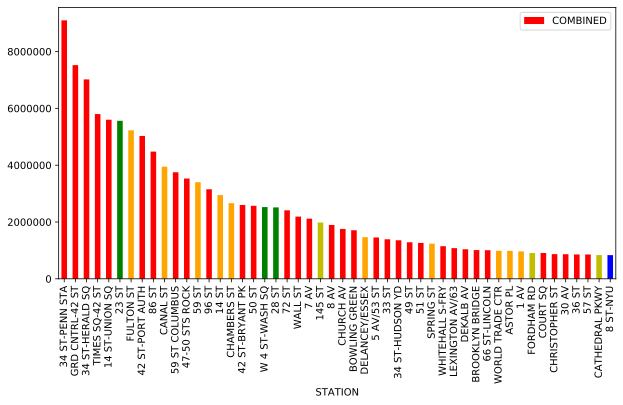

In [14]:
funcs.create_interested_colored_bar_graph(aug_totals_with_score, 50)

In [15]:
# filter the merged dataframe to keep only the stations with interest score gretater than or = 4
aug_totals_with_score_leaders = aug_totals_with_score[aug_totals_with_score["total score"]>=4]
# take the top ten, this is what we will focus on
leader_stations = aug_totals_with_score_leaders.head(10)
# grab the station row (we will use this as our graph index)
leader_stations = leader_stations["STATION"]
# stations we want oprdered by traffic
leader_stations

5               23 ST
18     W 4 ST-WASH SQ
19              28 ST
23             145 ST
42         FORDHAM RD
48     CATHEDRAL PKWY
49           8 ST-NYU
55             135 ST
60        BLEECKER ST
63    137 ST CITY COL
Name: STATION, dtype: object

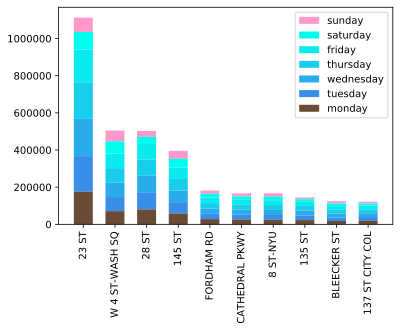

In [16]:
funcs.create_day_of_week_stacked_bar_graph(aug_2019_avg_traffic_per_day_per_station, leader_stations)

In [17]:
reset = aug_2019_avg_traffic_per_day_per_time_per_station.reset_index()

In [18]:
reset = reset[reset["STATION"].isin(leader_stations)]
reset.sort_values(by=["COMBINED"], ascending=False)

STATION    DAY_STR  DAY_INT      TIME  ENTRIES_DIFF  EXIT_DIFF  \
4097             23 ST  Wednesday        2  20:00:00       31959.2    12139.8   
4020             23 ST   Thursday        3  20:00:00       31340.6    12456.6   
4045             23 ST    Tuesday        1  20:00:00       30617.4    11497.6   
3983             23 ST     Monday        0  20:00:00       30491.4    11532.0   
3971             23 ST     Friday        4  20:00:00       24800.8    10696.4   
4037             23 ST    Tuesday        1  12:00:00       12541.6    20030.2   
4054             23 ST  Wednesday        2  12:00:00       12664.6    19831.0   
4015             23 ST   Thursday        3  12:00:00       12526.6    19469.0   
3979             23 ST     Monday        0  12:00:00       11724.0    18687.2   
3967             23 ST     Friday        4  12:00:00       10957.8    16485.6   
3969             23 ST     Friday        4  16:00:00       16687.8    10313.8   
58474   W 4 ST-WASH SQ   Thursday        3  21:00:00       14071.4    11365.0   
58482   W 4 ST-WASH SQ    Tuesday        1  21:00:00       13851.6    11027.0   
4018             23 ST   Thursday        3  16:00:00       14486.4     9825.6   
4095             23 ST  Wednesday        2  16:00:00       14560.6     9751.2   
58493   W 4 ST-WASH SQ  Wednesday        2  21:00:00       13008.8    10701.6   
58449   W 4 ST-WASH SQ     Friday        4  21:00:00       12454.2    10920.0   
4098             23 ST  Wednesday        2  21:00:00       15001.8     7914.0   
58455   W 4 ST-WASH SQ     Monday        0  21:00:00       12794.4     9883.0   
4021             23 ST   Thursday        3  21:00:00       14363.0     7961.8   
4046             23 ST    Tuesday        1  21:00:00       14592.8     7603.4   
4043             23 ST    Tuesday        1  16:00:00       13197.8     8902.0   
3981             23 ST     Monday        0  16:00:00       12945.6     8794.8   
3984             23 ST     Monday        0  21:00:00       13357.6     7075.2   
3995             23 ST   Saturday        5  20:00:00       12371.4     7231.8   
4405             28 ST  Wednesday        2  21:00:00       13439.6     6092.6   
58448   W 4 ST-WASH SQ     Friday        4  17:00:00       10204.6     9234.8   
3993             23 ST   Saturday        5  16:00:00       11239.6     7975.4   
58461   W 4 ST-WASH SQ   Saturday        5  21:00:00        9891.8     9270.2   
4393             28 ST    Tuesday        1  21:00:00       12822.2     5707.4   
4019             23 ST   Thursday        3  17:00:00       10700.6     7373.0   
4096             23 ST  Wednesday        2  17:00:00       10782.6     7181.8   
3970             23 ST     Friday        4  17:00:00       10899.0     6901.6   
58460   W 4 ST-WASH SQ   Saturday        5  17:00:00        8660.0     9114.6   
1039            145 ST   Thursday        3  20:00:00        7254.0    10465.6   
1045            145 ST    Tuesday        1  20:00:00        6957.4    10420.2   
4371             28 ST   Thursday        3  21:00:00       11506.6     5756.0   
4332             28 ST     Monday        0  21:00:00       11990.4     5207.4   
4044             23 ST    Tuesday        1  17:00:00       10113.8     7034.4   
4016             23 ST   Thursday        3  13:00:00        7114.6    10026.8   
1052            145 ST  Wednesday        2  20:00:00        6665.2    10230.4   
58473   W 4 ST-WASH SQ   Thursday        3  17:00:00        8977.4     7885.2   
1012            145 ST     Monday        0  20:00:00        6332.8    10367.6   
1006            145 ST     Friday        4  20:00:00        7107.4     9482.4   
4038             23 ST    Tuesday        1  13:00:00        6812.4     9559.4   
3982             23 ST     Monday        0  17:00:00        9649.2     6662.4   
4318             28 ST     Friday        4  17:00:00       10068.4     6121.6   
4316             28 ST     Friday        4  13:00:00        7856.0     8221.4   
58492   W 4 ST-WASH SQ  Wednesday        2  17

In [37]:
reset.groupby("TIME")[["COMBINED"]].sum().sort_values(by=["COMBINED"], ascending=False)
# plt.plot(twenty_three["TIME"].astype(str), twenty_three["COMBINED"])

COMBINED
TIME              
20:00:00  572659.4
21:00:00  453067.4
12:00:00  428778.8
16:00:00  391710.8
17:00:00  388213.8
13:00:00  337952.8
00:00:00  232344.6
09:00:00  220104.6
01:00:00  160661.8
08:00:00  144793.2
04:00:00   47888.2
05:00:00   25607.4
08:56:21    6388.0
08:50:10    5767.0
08:59:53    5550.0
08:23:53    4352.0
08:17:29    3625.0
08:52:33    3019.0
09:55:02    2748.0
14:20:15    2702.0
12:17:02    2663.0
10:33:38    2552.0
09:44:57    2478.0
08:36:39    2460.0
14:20:14    2401.0
10:33:45    2223.0
07:42:05    2190.0
14:07:02    2166.0
12:07:43    2120.0
10:26:32    2042.0
13:43:34    1807.0
08:13:57    1802.0
15:13:59    1735.0
09:07:34    1448.0
08:59:39    1381.0
07:48:11    1365.0
09:07:49    1355.0
08:16:45    1346.0
14:18:32    1302.0
09:00:08    1284.0
18:34:31    1283.0
08:50:30    1244.0
09:43:33    1214.0
08:13:20    1206.0
14:21:46    1111.0
08:49:29    1089.0
09:18:12     932.0
14:15:02     863.0
14:19:06     860.0
11:21:38     860.0
08:51:10     798.0
14:16:41     790.0
18:05:47     788.0
09:24:53     617.0
09:22:07     611.0
08:02:43     592.0
10:27:38     585.0
08:36:32     533.0
07:47:46     479.0
11:21:45     444.0
08:15:21     441.0
13:45:48     394.0
14:20:22     329.0
00:58:58     310.0
13:44:19     273.0
13:43:12     202.0
08:51:43     168.0
07:39:52     161.0
09:23:30     159.0
12:52:50     158.0
06:32:59     152.0
12:26:22     120.0
08:04:59     117.0
12:38:22      86.0
08:04:53      84.0
12:43:43      72.0
03:28:10      57.0
10:49:46      52.0
12:18:22      41.0
12:35:42      39.0
12:59:32      36.0
05:22:40      36.0
12:33:02      34.0
10:38:26      28.0
12:25:02      27.0
12:30:22      27.0
09:02:21      26.0
12:54:10      24.0
12:31:42      23.0
10:28:42      20.0
12:29:02      20.0
14:48:50      17.0
12:41:03      15.0
12:13:03      14.0
12:22:22      14.0
12:39:43      14.0
12:55:31      13.0
18:37:14      13.0
12:09:04      13.0
12:23:42      13.0
12:10:22      13.0
12:42:23      13.0
12:11:42      12.0
10:29:56      11.0
18:38:34      11.0
18:35:51      11.0
12:19:42      11.0
12:37:02      10.0
10:29:55       9.0
12:58:12       9.0
12:15:42       8.0
12:21:02       8.0
12:34:22       7.0
12:45:03       7.0
10:39:43       7.0
18:39:55       7.0
18:41:15       6.0
12:14:22       6.0
12:56:51       6.0
12:46:23       6.0
12:27:42       4.0
05:25:24       2.0
01:00:18       2.0
05:26:44       1.0
05:24:03       0.0
03:30:51       0.0
09:00:56       0.0
13:00:53       0.0
05:28:22       0.0
03:29:31       0.0